In [30]:
%load_ext rpy2.ipython
%matplotlib inline
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [31]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import time
import glob

data/amd.csv
data/goog.csv
data/orcl.csv
data/intc.csv


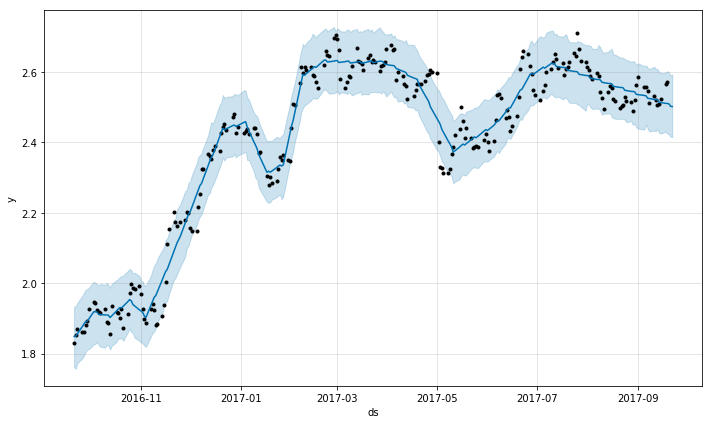

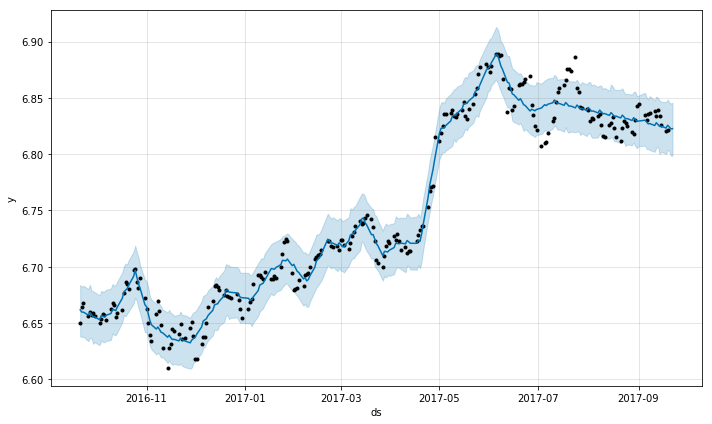

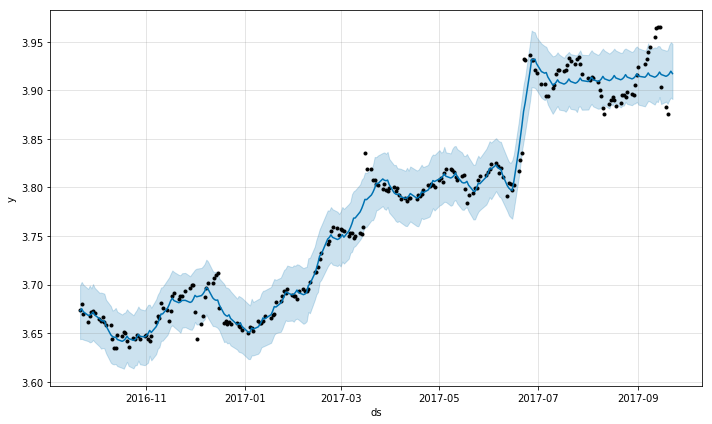

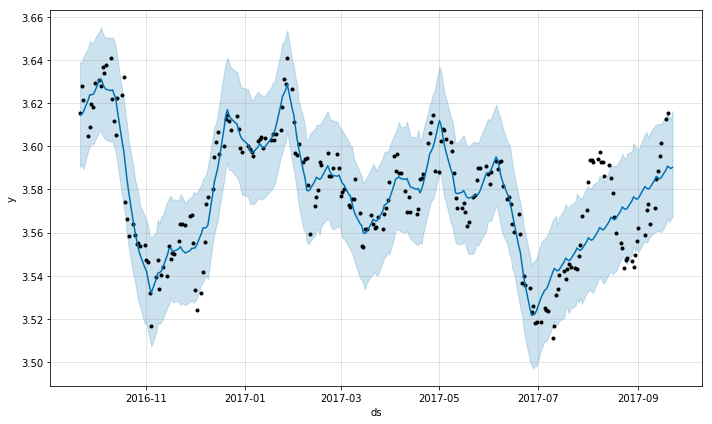

In [56]:
for name in glob.glob('data/*'):
    print(name)
    df = pd.read_csv(name)
    mean = np.log( (df['High'].astype(np.float) + df['Low'].astype(np.float))/2)
    df2 = pd.DataFrame( { 'ds': df['Date'], 'y':mean} )
    #m = Prophet(interval_width=0.95, mcmc_samples=300) # support Uncertainty in seasonality
    m = Prophet(interval_width=0.95, mcmc_samples=0,changepoint_prior_scale=1.5) # frexible change point: start 0.05 , when increase more flexible 
    
    m.fit(df2)
    future = m.make_future_dataframe(periods=3)
    forecast = m.predict(future)
    m.plot(forecast)

In [40]:
help(Prophet)

Help on class Prophet in module fbprophet.forecaster:

class Prophet(builtins.object)
 |  Prophet forecaster.
 |  
 |  Parameters
 |  ----------
 |  growth: String 'linear' or 'logistic' to specify a linear or logistic
 |      trend.
 |  changepoints: List of dates at which to include potential changepoints. If
 |      not specified, potential changepoints are selected automatically.
 |  n_changepoints: Number of potential changepoints to include. Not used
 |      if input `changepoints` is supplied. If `changepoints` is not supplied,
 |      then n_changepoints potential changepoints are selected uniformly from
 |      the first 80 percent of the history.
 |  yearly_seasonality: Fit yearly seasonality.
 |      Can be 'auto', True, False, or a number of Fourier terms to generate.
 |  weekly_seasonality: Fit weekly seasonality.
 |      Can be 'auto', True, False, or a number of Fourier terms to generate.
 |  daily_seasonality: Fit daily seasonality.
 |      Can be 'auto', True, False, o